In [1]:
import pandas as pd
df = pd.read_csv('c:/data/regression/test.csv')
df.head()

,x,y
0,1,1.619379
1,2,1.857290
2,3,2.628194
3,4,2.725426
4,5,3.498926


In [2]:
import torch
X = torch.from_numpy(df['x'].values).unsqueeze(1).float()
y = torch.from_numpy(df['y'].values).unsqueeze(1).float()

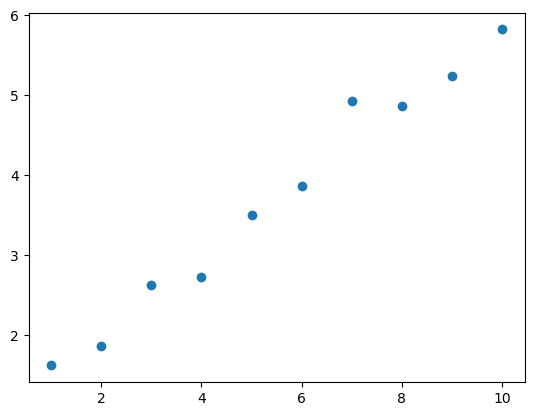

In [3]:
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
plt.scatter(X, y)
plt.show()

In [4]:
from torch import nn
# 단순한 신경망
model = nn.Linear(in_features=1, out_features=1, bias=True)
print(model)

# 초기 파라미터
print(model.weight)
print(model.bias)

Linear(in_features=1, out_features=1, bias=True)
Parameter containing:
tensor([[-0.2929]], requires_grad=True)
Parameter containing:
tensor([-0.6435], requires_grad=True)


In [6]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)
print(model(X)) # 학습 전

tensor([[-0.9364],
        [-1.2293],
        [-1.5223],
        [-1.8152],
        [-2.1081],
        [-2.4010],
        [-2.6939],
        [-2.9868],
        [-3.2797],
        [-3.5726]], grad_fn=<AddmmBackward0>)


In [7]:
for step in range(500):
    prediction = model(X)
    loss = criterion(input=prediction, target=y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f'epoch: {step}, loss: {loss:.3f}')

epoch: 0, loss: 40.537
epoch: 1, loss: 39.639
epoch: 2, loss: 38.752
epoch: 3, loss: 37.875
epoch: 4, loss: 37.009
epoch: 5, loss: 36.153
epoch: 6, loss: 35.309
epoch: 7, loss: 34.476
epoch: 8, loss: 33.654
epoch: 9, loss: 32.844
epoch: 10, loss: 32.045
epoch: 11, loss: 31.258
epoch: 12, loss: 30.482
epoch: 13, loss: 29.719
epoch: 14, loss: 28.967
epoch: 15, loss: 28.227
epoch: 16, loss: 27.500
epoch: 17, loss: 26.785
epoch: 18, loss: 26.081
epoch: 19, loss: 25.390
epoch: 20, loss: 24.711
epoch: 21, loss: 24.045
epoch: 22, loss: 23.391
epoch: 23, loss: 22.748
epoch: 24, loss: 22.118
epoch: 25, loss: 21.501
epoch: 26, loss: 20.895
epoch: 27, loss: 20.302
epoch: 28, loss: 19.720
epoch: 29, loss: 19.151
epoch: 30, loss: 18.593
epoch: 31, loss: 18.047
epoch: 32, loss: 17.513
epoch: 33, loss: 16.991
epoch: 34, loss: 16.480
epoch: 35, loss: 15.981
epoch: 36, loss: 15.493
epoch: 37, loss: 15.017
epoch: 38, loss: 14.551
epoch: 39, loss: 14.097
epoch: 40, loss: 13.653
epoch: 41, loss: 13.220
ep

In [8]:
print(model(X)) # 학습 후

tensor([[1.0735],
        [1.6360],
        [2.1984],
        [2.7608],
        [3.3233],
        [3.8857],
        [4.4482],
        [5.0106],
        [5.5731],
        [6.1355]], grad_fn=<AddmmBackward0>)


In [9]:
def mse_loss(preds, trues):
    return torch.sum((preds - trues) ** 2) / preds.view(-1).shape[0]
mse_loss(model(X), y)

tensor(0.1029, grad_fn=<DivBackward0>)

In [10]:
loss.data.item(), model.weight.data.item(), model.bias.data.item()

(0.1030760407447815, 0.5624445080757141, 0.5110681056976318)

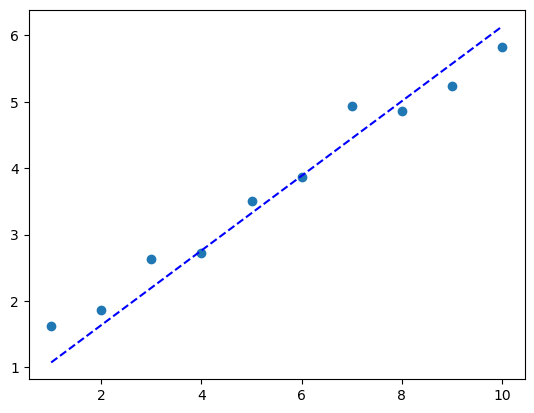

In [11]:
def display_results(model, x, y):
    pred = model(x)
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), pred.data.numpy(), 'b--')
    plt.show()
display_results(model, X, y)